# Meta-population population flux library
## cv19mobility

In [3]:
%matplotlib tk

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
from cv19gm.utils import cv19mobility_old

In [29]:
population = [10000,15000,20000,30000]

In [30]:
mobility = cv19mobility_old.rnd_flux_symmetric(population = population,fraction=0.1)

In [31]:
mobility(0.2)

array([[   0,  366,  402,  231],
       [ 579,    0,  140,  779],
       [ 449,  318,    0, 1231],
       [2194,  137,  668,    0]])

In [34]:
mobility(0.7)

array([[   0,  579,  449, 2194],
       [ 366,    0,  318,  137],
       [ 402,  140,    0,  668],
       [ 231,  779, 1231,    0]])

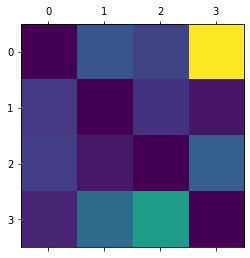

In [32]:
plt.matshow(mobility(0.5),)

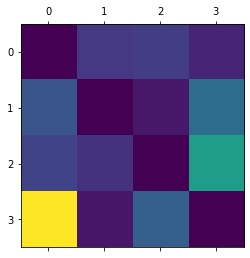

In [33]:
plt.matshow(mobility(0),)

In [27]:
a = cv19mobility_old.export_mobility(mobility)

In [28]:
a

'{"0.0": [[0, 781, 218], [689, 0, 810], [691, 1308, 0]], "0.5": [[0, 689, 691], [781, 0, 1308], [218, 810, 0]], "1.0": [[0, 781, 218], [689, 0, 810], [691, 1308, 0]], "1.5": [[0, 689, 691], [781, 0, 1308], [218, 810, 0]]}'

In [44]:
def import_mobility(input=None,path=None,fill='periodic'):
    """Create mobility matrix from data

    Args:
        input (dic): Create Use a numpy array or a list as a base
        path (_type_, optional): Path to json file. Defaults to None.
        fill (str, optional): Mechanism for completing the matrix after. Defaults to 'periodic'.

    Returns:
        _type_: _description_
    """
    aux = {}
    if not t:
        t = np.arange(0,2,0.5)
    for i in t:
        aux[i] = mobfunction(i).tolist()
    if path:
        json.dump(aux,path)
    return json.dumps(aux)

TypeError: Object of type ndarray is not JSON serializable

In [9]:
from numpy import linspace
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [17]:
from numpy import linspace
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')


In [19]:
from numpy import linspace
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import signal

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')


t = np.linspace(0, 1, 1000, endpoint=True)
ax.plot3D(t, signal.square(2 * np.pi * 5 * t))


In [20]:
from numpy import linspace
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import signal

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

t = np.linspace(0, 1, 1000, endpoint=True)
ax.plot3D(t, signal.square(2 * np.pi * 5 * t))

for angle in range(0, 360):
    ax.view_init(angle,30)
    plt.draw()
    plt.pause(.001)


KeyboardInterrupt: 

In [8]:
from numpy import linspace
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import signal

# Creating 3D figure
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')

# Creating Dataset
t = np.linspace(0, 1, 1000, endpoint = True)
ax.plot3D(t, signal.square(2 * np.pi * 5 * t))

# 360 Degree view
for angle in range(0, 360):
    ax.view_init(angle, 30)
    plt.draw()
    plt.pause(.001)
	
plt.show()


KeyboardInterrupt: 

-------

In [7]:
from cv19gm.utils import cv19mobility_old
import numpy as np

In [8]:
population = [10000,15000,20000,30000]
mobility = cv19mobility_old.rnd_flux_symmetric(population = population,fraction=0.1)

In [9]:
mob_matrix = cv19mobility_old.mobility_to_tensor(mobility,100)

In [10]:
np.shape(mob_matrix)

(201, 4, 4)

In [11]:
len(mob_matrix)

201

In [12]:

int(2*1.5)

3

In [13]:
import numpy as np

In [14]:
def gravity_model(populations, distances, beta):
    mobility_matrix = np.zeros((len(populations), len(populations)))

    for i in range(len(populations)):
        for j in range(len(populations)):
            if i != j:
                mobility_matrix[i, j] = (populations[i] * populations[j]) / (distances[i, j] ** beta)

    return mobility_matrix

def radiation_model(populations, distances, s):
    mobility_matrix = np.zeros((len(populations), len(populations)))

    for i in range(len(populations)):
        for j in range(len(populations)):
            if i != j:
                numerator = populations[i] * populations[j]
                denominator = (populations[i] + s[i, j]) * (populations[i] + populations[j] + s[i, j])
                mobility_matrix[i, j] = numerator / denominator

    return mobility_matrix

def create_mobility_matrix(populations, distances, model, **kwargs):
    if model == 'gravity':
        return gravity_model(populations, distances, kwargs.get('beta', 2))
    elif model == 'radiation':
        return radiation_model(populations, distances, kwargs.get('s', np.zeros_like(distances)))
    else:
        raise ValueError(f"Unsupported model: {model}")

In [15]:
# Example usage
populations = np.array([1000, 2000, 3000, 4000])  # Population sizes for each region
distances = np.array([
    [0, 10, 20, 30],
    [10, 0, 30, 40],
    [20, 30, 0, 50],
    [30, 40, 50, 0]
])  # Pairwise distances between regions

s = np.array([
    [0, 300, 600, 900],
    [300, 0, 900, 1200],
    [600, 900, 0, 1500],
    [900, 1200, 1500, 0]
])  # Example of s_ij values for the radiation model

gravity_matrix = create_mobility_matrix(populations, distances, 'gravity', beta=2)
radiation_matrix = create_mobility_matrix(populations, distances, 'radiation', s=s)

print("Gravity model mobility matrix:")
print(gravity_matrix)
print("Radiation model mobility matrix:")
print(radiation_matrix)

Gravity model mobility matrix:
[[    0.         20000.          7500.          4444.44444444]
 [20000.             0.          6666.66666667  5000.        ]
 [ 7500.          6666.66666667     0.          4800.        ]
 [ 4444.44444444  5000.          4800.             0.        ]]
Radiation model mobility matrix:
[[0.         0.46620047 0.4076087  0.35682426]
 [0.26350461 0.         0.35067212 0.34722222]
 [0.18115942 0.26075619 0.         0.31372549]
 [0.13836043 0.21367521 0.25668449 0.        ]]


In [16]:
def gravity_model(populations, distances, beta):
    mobility_matrix = np.zeros((len(populations), len(populations)))

    for i in range(len(populations)):
        for j in range(len(populations)):
            if i != j:
                mobility_matrix[i, j] = (populations[i] * populations[j]) / (distances[i, j] ** beta)

    return mobility_matrix

def radiation_model(populations, distances, s):
    mobility_matrix = np.zeros((len(populations), len(populations)))

    for i in range(len(populations)):
        for j in range(len(populations)):
            if i != j:
                numerator = populations[i] * populations[j]
                denominator = (populations[i] + s[i, j]) * (populations[i] + populations[j] + s[i, j])
                mobility_matrix[i, j] = numerator / denominator

    return mobility_matrix

def random_mobility_model(populations, distances, fraction):
    mobility_matrix = np.zeros((len(populations), len(populations)))

    for i in range(len(populations)):
        for j in range(len(populations)):
            if i != j:
                mobility_matrix[i, j] = np.random.uniform(0, populations[i] * fraction)

        # Normalize row to ensure the total moved population is a fraction of the region's population
        mobility_matrix[i, :] /= np.sum(mobility_matrix[i, :])
        mobility_matrix[i, :] *= populations[i] * fraction

    return mobility_matrix

def create_random_distances_matrix(n, min_distance, max_distance):
    distances = np.random.uniform(min_distance, max_distance, (n, n))
    np.fill_diagonal(distances, 0)
    return distances + distances.T  # Make the matrix symmetric

def create_mobility_matrix(populations, distances=None, model='gravity', **kwargs):
    if distances is None:
        distances = create_random_distances_matrix(len(populations), 10, 100)

    if model == 'gravity':
        return gravity_model(populations, distances, kwargs.get('beta', 2))
    elif model == 'radiation':
        return radiation_model(populations, distances, kwargs.get('s', np.zeros_like(distances)))
    elif model == 'random':
        return random_mobility_model(populations, distances, kwargs.get('fraction', 0.1))
    else:
        raise ValueError(f"Unsupported model: {model}")


In [17]:
# Example usage
populations = np.array([1000, 2000, 3000, 4000])  # Population sizes for each region

gravity_matrix = create_mobility_matrix(populations, model='gravity')
radiation_matrix = create_mobility_matrix(populations, model='radiation')
random_matrix = create_mobility_matrix(populations, model='random')

print("Gravity model mobility matrix:")
print(gravity_matrix)
print("Radiation model mobility matrix:")
print(radiation_matrix)
print("Random mobility model mobility matrix:")
print(random_matrix)

Gravity model mobility matrix:
[[   0.          327.85007986  108.42958099  201.58628345]
 [ 327.85007986    0.         1151.99886155  836.36145992]
 [ 108.42958099 1151.99886155    0.          668.33688409]
 [ 201.58628345  836.36145992  668.33688409    0.        ]]
Radiation model mobility matrix:
[[0.         0.66666667 0.75       0.8       ]
 [0.33333333 0.         0.6        0.66666667]
 [0.25       0.4        0.         0.57142857]
 [0.2        0.33333333 0.42857143 0.        ]]
Random mobility model mobility matrix:
[[  0.          21.34702271  31.68616259  46.9668147 ]
 [150.33581016   0.          38.51659593  11.14759391]
 [ 30.32694627 261.0581437    0.           8.61491003]
 [159.88807246  95.16663549 144.94529206   0.        ]]


In [18]:

def daily_mobility_pattern(mobility_matrix, amplitude=0.5, period=1, phase_shift=0):
    def time_varying_mobility(t):
        modulator = 1 + amplitude * np.sin(2 * np.pi * (t - phase_shift) / period)
        return mobility_matrix * modulator

    return time_varying_mobility

def rush_hour_mobility_pattern(mobility_matrix, peak_amplitude=0.5, off_peak_amplitude=-0.5, peak_start=7/24, peak_end=9/24, evening_start=17/24, evening_end=19/24):
    def time_varying_mobility(t):
        if peak_start <= t < peak_end:
            scaling_factor = 1 + off_peak_amplitude + (peak_amplitude - off_peak_amplitude) * (t - peak_start) / (peak_end - peak_start)
        elif peak_end <= t < evening_start:
            scaling_factor = 1 + off_peak_amplitude
        elif evening_start <= t < evening_end:
            scaling_factor = 1 + off_peak_amplitude + (peak_amplitude - off_peak_amplitude) * (t - evening_start) / (evening_end - evening_start)
        else:
            scaling_factor = 1 + off_peak_amplitude
        return mobility_matrix * scaling_factor

    return time_varying_mobility

In [19]:
# Example usage
populations = np.array([1000, 2000, 3000, 4000])  # Population sizes for each region

gravity_matrix = create_mobility_matrix(populations, model='gravity')

# Create a time-varying mobility matrix function
daily_mobility = daily_mobility_pattern(gravity_matrix, amplitude=0.5, period=24, phase_shift=0)

# Evaluate the mobility matrix for different time instances (in hours)
print("Time-varying mobility matrix at t = 0 hours:")
print(daily_mobility(0))
print("Time-varying mobility matrix at t = 6 hours:")
print(daily_mobility(6))
print("Time-varying mobility matrix at t = 12 hours:")
print(daily_mobility(12))
print("Time-varying mobility matrix at t = 18 hours:")
print(daily_mobility(18))


Time-varying mobility matrix at t = 0 hours:
[[   0.          158.36395924  710.44060807  143.60163403]
 [ 158.36395924    0.          310.17911171  625.74905759]
 [ 710.44060807  310.17911171    0.         1527.81556812]
 [ 143.60163403  625.74905759 1527.81556812    0.        ]]
Time-varying mobility matrix at t = 6 hours:
[[   0.          237.54593887 1065.6609121   215.40245105]
 [ 237.54593887    0.          465.26866757  938.62358639]
 [1065.6609121   465.26866757    0.         2291.72335217]
 [ 215.40245105  938.62358639 2291.72335217    0.        ]]
Time-varying mobility matrix at t = 12 hours:
[[   0.          158.36395924  710.44060807  143.60163403]
 [ 158.36395924    0.          310.17911171  625.74905759]
 [ 710.44060807  310.17911171    0.         1527.81556812]
 [ 143.60163403  625.74905759 1527.81556812    0.        ]]
Time-varying mobility matrix at t = 18 hours:
[[  0.          79.18197962 355.22030403  71.80081702]
 [ 79.18197962   0.         155.08955586 312.8745288

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# ... (previous functions)

# Example usage
# ... (same as before)

# Visualization function
def plot_mobility_matrix(t):
    mobility_matrix_t = daily_mobility(t)
    plt.figure(figsize=(8, 6))
    plt.imshow(mobility_matrix_t, cmap='viridis', origin='lower')
    plt.colorbar(label='Mobility')
    plt.title(f"Time-varying Mobility Matrix at t = {t} hours")
    plt.xlabel("Destination Region")
    plt.ylabel("Origin Region")
    plt.xticks(range(len(populations)))
    plt.yticks(range(len(populations)))
    plt.show()

# Interactive plot
interact(plot_mobility_matrix, t=IntSlider(min=0, max=24, step=1, value=0, continuous_update=False))


interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=24), Output()), _dom_cl…

<function __main__.plot_mobility_matrix(t)>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# ... (previous functions and example usage)

# Visualization function with fixed scale
def plot_mobility_matrix(t):
    mobility_matrix_t = daily_mobility(t)
    plt.figure(figsize=(8, 6))
    plt.imshow(mobility_matrix_t, cmap='viridis', origin='lower',
               vmin=np.min(gravity_matrix), vmax=np.max(gravity_matrix))
    plt.colorbar(label='Mobility')
    plt.title(f"Time-varying Mobility Matrix at t = {t} hours")
    plt.xlabel("Destination Region")
    plt.ylabel("Origin Region")
    plt.xticks(range(len(populations)))
    plt.yticks(range(len(populations)))
    plt.show()

# Interactive plot
interact(plot_mobility_matrix, t=IntSlider(min=0, max=24, step=1, value=0, continuous_update=False))


interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=24), Output()), _dom_cl…

<function __main__.plot_mobility_matrix(t)>

In [22]:
rush_hour_mobility = rush_hour_mobility_pattern(gravity_matrix)

# Visualization function with fixed scale
# ... (same as before)

# Interactive plot for rush hour mobility
interact(plot_mobility_matrix, t=IntSlider(min=0, max=24, step=1, value=0, continuous_update=False))

interactive(children=(IntSlider(value=0, continuous_update=False, description='t', max=24), Output()), _dom_cl…

<function __main__.plot_mobility_matrix(t)>

In [23]:
population = np.array([1000, 2000, 3000, 4000])  # Population sizes for each region
mobility_matrix = create_mobility_matrix(population, model='gravity') 

In [24]:
mobility_matrix

array([[   0.        ,  240.19398085, 1168.73487847,  155.98818476],
       [ 240.19398085,    0.        ,  204.154334  , 1045.73721908],
       [1168.73487847,  204.154334  ,    0.        ,  792.64721471],
       [ 155.98818476, 1045.73721908,  792.64721471,    0.        ]])

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# ... (previous functions)


# Example usage
# ... (same as before)

# Create a time-varying mobility matrix function with rush hour pattern
rush_hour_mobility = rush_hour_mobility_pattern(gravity_matrix)

# Visualization function with fixed scale
# ... (same as before)

# Interactive plot for rush hour mobility
interact(plot_mobility_matrix, t=FloatSlider(min=0, max=1, step=1/24, value=0, continuous_update=False))


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='t', max=1.0, step=0.0416666…

<function __main__.plot_mobility_matrix(t)>

In [29]:
rush_hour_mobility(1)

array([[  0.        ,  79.18197962, 355.22030403,  71.80081702],
       [ 79.18197962,   0.        , 155.08955586, 312.8745288 ],
       [355.22030403, 155.08955586,   0.        , 763.90778406],
       [ 71.80081702, 312.8745288 , 763.90778406,   0.        ]])

In [30]:
gravity_matrix

array([[   0.        ,  158.36395924,  710.44060807,  143.60163403],
       [ 158.36395924,    0.        ,  310.17911171,  625.74905759],
       [ 710.44060807,  310.17911171,    0.        , 1527.81556812],
       [ 143.60163403,  625.74905759, 1527.81556812,    0.        ]])

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# ... (previous functions)

# Simulation function with updated population flux calculations
def simulate_population(populations, mobility_function, dt, steps):
    current_populations = populations.copy()
    population_history = [current_populations]

    for _ in range(steps):
        mobility_matrix = mobility_function(dt)
        outgoing = np.sum(mobility_matrix, axis=1)
        incoming = np.sum(mobility_matrix, axis=0)
        current_populations = current_populations - outgoing + incoming
        population_history.append(current_populations)

    return np.array(population_history)

# Example usage
# ... (same as before)

# Create a time-varying mobility matrix function with rush hour pattern
rush_hour_mobility = rush_hour_mobility_pattern(gravity_matrix)

# Simulate population dynamics
dt = 1 / 24  # Time step of 1 hour
steps = 24  # Number of steps
population_history = simulate_population(populations, rush_hour_mobility, dt, steps)

# Visualization function for population dynamics
def plot_population(t):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(populations)), population_history[t], color='orange')
    plt.title(f"Population at t = {t} hours")
    plt.xlabel("Region")
    plt.ylabel("Population")
    plt.xticks(range(len(populations)))
    plt.ylim(0, np.max(populations) * 1.5)
    plt.show()

# Interactive plot for population dynamics
interact(plot_population, t=IntSlider(min=0, max=steps, step=1, value=0, continuous_update=True))


interactive(children=(IntSlider(value=0, description='t', max=24), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_population(t)>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# ... (previous functions)

# Simulate population dynamics
# ... (same as before)

# Visualization function for population dynamics
def plot_population(region):
    plt.figure(figsize=(8, 6))
    plt.plot(population_history[:, region], linestyle='-', marker='o', markersize=4)
    plt.title(f"Population at Region {region} vs Time")
    plt.xlabel("Time (hours)")
    plt.ylabel("Population")
    plt.xticks(range(0, steps+1, 2))
    plt.ylim(0, np.max(populations) * 1.5)
    plt.grid()
    plt.show()

# Interactive plot for population dynamics
interact(plot_population, region=IntSlider(min=0, max=len(populations)-1, step=1, value=0, continuous_update=False))


interactive(children=(IntSlider(value=0, continuous_update=False, description='region', max=3), Output()), _do…

<function __main__.plot_population(region)>

In [ ]:
# Simulation function
def simulate_population(populations, mobility_function, dt, steps):
    current_populations = populations.copy()
    population_history = [current_populations]

    for _ in range(steps):
        mobility_matrix = mobility_function(dt)
        outgoing = np.sum(mobility_matrix, axis=1) * current_populations
        incoming = np.sum(mobility_matrix * current_populations, axis=0)
        current_populations = current_populations - outgoing + incoming
        population_history.append(current_populations)

    return np.array(population_history)


In [33]:
np.sum(mobility_matrix, axis=1)

array([1564.91704408, 1490.08553393, 2165.53642718, 1994.37261855])

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# ... (previous functions)

def daily_mobility_pattern(mobility_matrix, amplitude=0.5, period=24, phase_shift=0):
    def time_varying_mobility(t):
        scaling_factor = 1 + amplitude * np.sin(2 * np.pi * (t / period - phase_shift))
        return mobility_matrix * scaling_factor

    return time_varying_mobility

def rush_hour_mobility_pattern(mobility_matrix, peak_amplitude=0.5, off_peak_amplitude=-0.5, peak_start=7, peak_end=9, evening_start=17, evening_end=19):
    def time_varying_mobility(t):
        if peak_start <= t < peak_end:
            scaling_factor = 1 + off_peak_amplitude + (peak_amplitude - off_peak_amplitude) * (t - peak_start) / (peak_end - peak_start)
        elif peak_end <= t < evening_start:
            scaling_factor = 1 + off_peak_amplitude
        elif evening_start <= t < evening_end:
            scaling_factor = 1 + off_peak_amplitude + (peak_amplitude - off_peak_amplitude) * (t - evening_start) / (evening_end - evening_start)
        else:
            scaling_factor = 1 + off_peak_amplitude
        return mobility_matrix * scaling_factor

    return time_varying_mobility

# Example usage
# ... (same as before)

# Create a time-varying mobility matrix function with rush hour pattern
rush_hour_mobility = rush_hour_mobility_pattern(gravity_matrix)

# Simulate population dynamics
dt = 1  # Time step of 1 hour
steps = 24  # Number of steps
population_history = simulate_population(populations, rush_hour_mobility, dt, steps)

# Visualization function for population dynamics
# ... (same as before)

# Interactive plot for population dynamics
interact(plot_population, region=IntSlider(min=0, max=len(populations)-1, step=1, value=0, continuous_update=False))


interactive(children=(IntSlider(value=0, continuous_update=False, description='region', max=3), Output()), _do…

<function __main__.plot_population(region)>

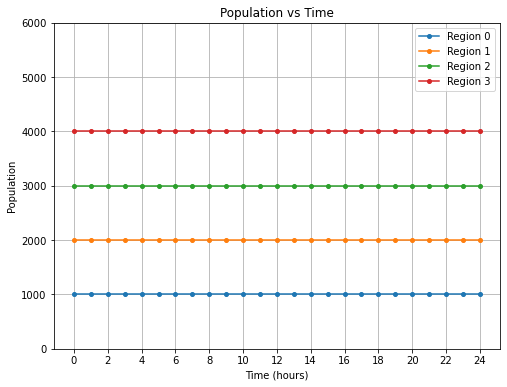

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# ... (previous functions)

# Simulation function with fixed time step handling
def simulate_population(populations, mobility_function, dt, steps):
    current_populations = populations.copy()
    population_history = [current_populations]

    for i in range(steps):
        mobility_matrix = mobility_function(i * dt)
        outgoing = np.sum(mobility_matrix, axis=1)
        incoming = np.sum(mobility_matrix, axis=0)
        current_populations = current_populations - outgoing + incoming
        population_history.append(current_populations)

    return np.array(population_history)

# Example usage
# ... (same as before)

# Create a time-varying mobility matrix function with rush hour pattern
rush_hour_mobility = rush_hour_mobility_pattern(gravity_matrix)

# Simulate population dynamics
dt = 1  # Time step of 1 hour
steps = 24  # Number of steps
population_history = simulate_population(populations, rush_hour_mobility, dt, steps)

# Plot population dynamics for all regions
plt.figure(figsize=(8, 6))
for region in range(len(populations)):
    plt.plot(population_history[:, region], linestyle='-', marker='o', markersize=4, label=f"Region {region}")

plt.title("Population vs Time")
plt.xlabel("Time (hours)")
plt.ylabel("Population")
plt.xticks(range(0, steps+1, 2))
plt.ylim(0, np.max(populations) * 1.5)
plt.grid()
plt.legend()
plt.show()


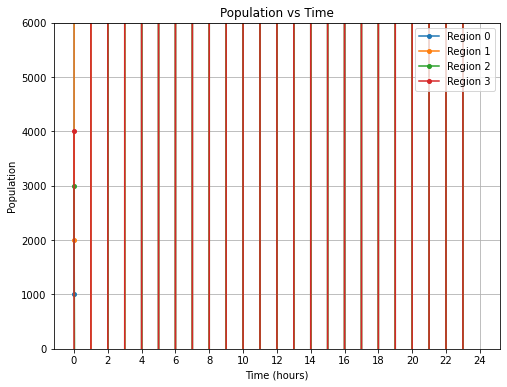

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# ... (previous functions)

# Corrected simulation function
def simulate_population(populations, mobility_function, dt, steps):
    current_populations = populations.copy()
    population_history = [current_populations]

    for i in range(steps):
        mobility_matrix = mobility_function(i * dt)
        outgoing = (mobility_matrix.T * current_populations).T
        incoming = mobility_matrix @ current_populations
        current_populations = current_populations - np.sum(outgoing, axis=1) + incoming
        population_history.append(current_populations)

    return np.array(population_history)

# Example usage
# ... (same as before)

# Create a time-varying mobility matrix function with rush hour pattern
rush_hour_mobility = rush_hour_mobility_pattern(gravity_matrix)

# Simulate population dynamics
dt = 1  # Time step of 1 hour
steps = 24  # Number of steps
population_history = simulate_population(populations, rush_hour_mobility, dt, steps)

# Plot population dynamics for all regions
plt.figure(figsize=(8, 6))
for region in range(len(populations)):
    plt.plot(population_history[:, region], linestyle='-', marker='o', markersize=4, label=f"Region {region}")

plt.title("Population vs Time")
plt.xlabel("Time (hours)")
plt.ylabel("Population")
plt.xticks(range(0, steps+1, 2))
plt.ylim(0, np.max(populations) * 1.5)
plt.grid()
plt.legend()
plt.show()


In [42]:
np.shape(population_history)

(25, 4)

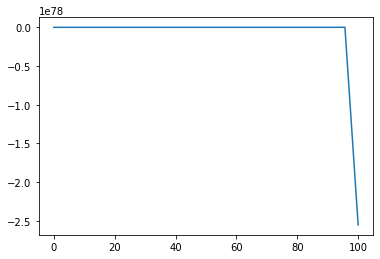

In [46]:
plt.plot(np.linspace(0,100,24),population_history[:-1,0])

In [63]:
import numpy as np

def random_mobility_model(population, fraction=0.4, seed=None):
    """Generate a random flux matrix that moves the specified fraction of the population.
    This method uses the dirichlet distribution in order to distribute the population maintaining the total.

    ref: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.dirichlet.html#numpy.random.Generator.dirichlet

    Args:
        population (array): array with the population of each town that makes part of this meta-population system.
        fraction (float, array, optional): Population fraction that travels per day. This can also be an array that specifies a different
        fraction per population. Defaults to 0.1.

    Returns:
        np.array: Flux matrix with 0 diagonals
    """
    size = len(population)
    if not isinstance(fraction, (list, np.ndarray)):
        fraction = np.ones(size) * fraction

    rng = np.random.default_rng(seed=seed)
    
    aux = []
    for i in range(size):
        aux.append(np.insert(rng.dirichlet(np.ones(size - 1), size=1) * population[i] * fraction[i], i, 0))
    return np.array(aux).astype(int)

In [61]:

def random_mobility_model(populations, distances):
    """
    Calculate the random mobility matrix.
    
    Parameters:
    -----------
    populations : np.array
        Array of populations for each region.
    distances : np.array
        Matrix of distances between regions.
        
    Returns:
    --------
    np.array
        Random mobility matrix.
    """
    num_regions = len(populations)
    mobility_matrix = np.random.rand(num_regions, num_regions)

    # Zero out diagonal elements
    np.fill_diagonal(mobility_matrix, 0)

    # Normalize rows to sum up to the total population
    row_sums = mobility_matrix.sum(axis=1, keepdims=True)
    mobility_matrix = mobility_matrix / row_sums * populations[:, np.newaxis]

    return mobility_matrix.astype(int)

In [69]:
random_mobility_model_2(np.array([100, 100, 100, 100, 100]),fraction=0.9,seed=40)

array([[ 0, 26, 27, 33,  2],
       [26,  0, 47, 12,  3],
       [17, 65,  0,  4,  3],
       [46,  4,  8,  0, 30],
       [17, 47, 15,  9,  0]])

In [68]:
random_mobility_model(np.array([100, 100, 100, 100, 100]),0)#, fraction=0.1,seed=42)

array([[ 0.        ,  1.98036317, 39.95834828, 21.54443825, 36.5168503 ],
       [26.65023678,  0.        ,  7.85857921, 27.43172961, 38.0594544 ],
       [18.68848926, 37.10312489,  0.        , 16.20114045, 28.0072454 ],
       [52.60288256, 23.31339944, 22.03163229,  0.        ,  2.0520857 ],
       [22.40519886, 30.5894439 , 26.8718914 , 20.13346583,  0.        ]])

In [70]:
def gravity_model(populations, distances, alpha=1, beta=1):
    """
    Calculate the gravity model mobility matrix.
    
    Parameters:
    -----------
    populations : np.array
        Array of populations for each region.
    distances : np.array
        Matrix of distances between regions.
    alpha : float
        Parameter to control the effect of population sizes.
    beta : float
        Parameter to control the effect of distances.
        
    Returns:
    --------
    np.array
        Mobility matrix based on the gravity model.
    """
    num_regions = len(populations)
    mobility_matrix = np.zeros((num_regions, num_regions))

    for i in range(num_regions):
        for j in range(num_regions):
            if i != j:
                mobility_matrix[i, j] = (populations[i] ** alpha) * (populations[j] ** alpha) / (distances[i, j] ** beta)
    row_sums = mobility_matrix.sum(axis=1, keepdims=True)
    mobility_matrix = mobility_matrix / row_sums * populations[:, np.newaxis]
    
    return mobility_matrix.astype(int)


In [76]:

g = gravity_model(np.array([100, 100, 100, 100, 100]),np.array([[0, 1, 2, 3, 4], [1, 0, 1, 2, 3], [2, 1, 0, 1, 2], [3, 2, 1, 0, 1], [4, 3, 2, 1, 0]]), alpha=1, beta=1)

In [77]:
g

array([[ 0, 48, 24, 16, 12],
       [35,  0, 35, 17, 11],
       [16, 33,  0, 33, 16],
       [11, 17, 35,  0, 35],
       [11, 15, 23, 47,  0]])

In [78]:
g.sum(axis=1)

array([100,  98,  98,  98,  96])

In [79]:
def create_small_world_distances_matrix(size, k=4, p=0.1, seed=None):
    """
    Create a distance matrix in a small-world network shape using the Watts-Strogatz model.

    Args:
        size (int): The number of nodes (regions) in the distance matrix.
        k (int): Each node is connected to k nearest neighbors in a ring topology.
        p (float): The probability of rewiring each edge.
        seed (int, optional): Seed for the random number generator.

    Returns:
        np.array: A distance matrix in a small-world network shape.
    """
    import networkx as nx

    rng = np.random.default_rng(seed=seed)
    G = nx.watts_strogatz_graph(size, k, p, seed=rng)
    distances = nx.floyd_warshall_numpy(G)
    return distances


In [1]:
create_small_world_distances_matrix(5, k=4, p=0.1, seed=42)


NameError: name 'create_small_world_distances_matrix' is not defined

In [81]:
def create_ring_distances_matrix(size, distance=1):
    """
    Create a distance matrix in a ring shape.

    Args:
        size (int): The number of nodes (regions) in the distance matrix.
        distance (float): The distance between adjacent nodes (regions) in the ring.

    Returns:
        np.array: A distance matrix in a ring shape.
    """
    distances = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            distances[i, j] = distance * min(abs(i - j), size - abs(i - j))

    return distances

In [82]:
create_ring_distances_matrix(5, distance=1)

array([[0., 1., 2., 2., 1.],
       [1., 0., 1., 2., 2.],
       [2., 1., 0., 1., 2.],
       [2., 2., 1., 0., 1.],
       [1., 2., 2., 1., 0.]])

In [83]:
def create_grid_distances_matrix(rows, cols, distance=1):
    """
    Create a distance matrix in a grid shape.

    Args:
        rows (int): The number of rows in the grid.
        cols (int): The number of columns in the grid.
        distance (float): The distance between adjacent nodes (regions) in the grid.

    Returns:
        np.array: A distance matrix in a grid shape.
    """
    size = rows * cols
    distances = np.zeros((size, size))

    for i in range(size):
        for j in range(size):
            row_i, col_i = divmod(i, cols)
            row_j, col_j = divmod(j, cols)
            distances[i, j] = distance * (abs(row_i - row_j) + abs(col_i - col_j))

    return distances

In [84]:
create_grid_distances_matrix(5, 5, distance=1)

array([[0., 1., 2., 3., 4., 1., 2., 3., 4., 5., 2., 3., 4., 5., 6., 3.,
        4., 5., 6., 7., 4., 5., 6., 7., 8.],
       [1., 0., 1., 2., 3., 2., 1., 2., 3., 4., 3., 2., 3., 4., 5., 4.,
        3., 4., 5., 6., 5., 4., 5., 6., 7.],
       [2., 1., 0., 1., 2., 3., 2., 1., 2., 3., 4., 3., 2., 3., 4., 5.,
        4., 3., 4., 5., 6., 5., 4., 5., 6.],
       [3., 2., 1., 0., 1., 4., 3., 2., 1., 2., 5., 4., 3., 2., 3., 6.,
        5., 4., 3., 4., 7., 6., 5., 4., 5.],
       [4., 3., 2., 1., 0., 5., 4., 3., 2., 1., 6., 5., 4., 3., 2., 7.,
        6., 5., 4., 3., 8., 7., 6., 5., 4.],
       [1., 2., 3., 4., 5., 0., 1., 2., 3., 4., 1., 2., 3., 4., 5., 2.,
        3., 4., 5., 6., 3., 4., 5., 6., 7.],
       [2., 1., 2., 3., 4., 1., 0., 1., 2., 3., 2., 1., 2., 3., 4., 3.,
        2., 3., 4., 5., 4., 3., 4., 5., 6.],
       [3., 2., 1., 2., 3., 2., 1., 0., 1., 2., 3., 2., 1., 2., 3., 4.,
        3., 2., 3., 4., 5., 4., 3., 4., 5.],
       [4., 3., 2., 1., 2., 3., 2., 1., 0., 1., 4., 3., 2., 1., 

In [ ]:
def daily_variation_pattern(matrix, t, amplitude=0.1, period=24, phase_shift=0):
    """
    Modulate the mobility matrix with a sinusoidal daily variation pattern.

    Args:
        matrix (np.array): The mobility matrix to modulate.
        t (float): The current time in hours.
        amplitude (float, optional): Amplitude of the sinusoidal variation. Defaults to 0.1.
        period (float, optional): Period of the sinusoidal variation in hours. Defaults to 24.
        phase_shift (float, optional): Phase shift of the sinusoidal variation in hours. Defaults to 0.

    Returns:
        np.array: The modulated mobility matrix.
    """
    factor = 1 + amplitude * np.sin(2 * np.pi * (t - phase_shift) / period)
    daytime_matrix = matrix * factor
    nighttime_matrix = matrix.T * factor
    return daytime_matrix if 0 <= t % period < period / 2 else nighttime_matrix

def rush_hour_pattern(matrix, t, amplitude=0.2, rush_hour_start=7, rush_hour_end=9, period=24):
    """
    Modulate the mobility matrix with a rush hour daily variation pattern.

    Args:
        matrix (np.array): The mobility matrix to modulate.
        t (float): The current time in hours.
        amplitude (float, optional): Amplitude of the rush hour variation. Defaults to 0.2.
        rush_hour_start (float, optional): Start time of the morning rush hour in hours. Defaults to 7.
        rush_hour_end (float, optional): End time of the morning rush hour in hours. Defaults to 9.
        period (float, optional): Period of the daily variation in hours. Defaults to 24.

    Returns:
        np.array: The modulated mobility matrix.
    """
    hour = t % period
    if rush_hour_start <= hour < rush_hour_end:
        factor = 1 + amplitude
        return matrix * factor
    elif (rush_hour_start + period / 2) <= hour < (rush_hour_end + period / 2):
        return matrix.T * (1 + amplitude)
    else:
        return matrix
